# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

In this project I will work on a TMDB movies dataset which has the properties for 5000 movies has been released

## Question(s) for Analysis
>### 1- In which quarter do movies make more revenue ?
>### 2- Does high budget movies affect on revenue ?
>### 3- Does high budget movies affect on vote average ?
>### 4- In which peroid of time movies have the highest voting average? 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
<a id='wrangling'></a>
# Data Wrangling

### in the next few cells we will do some data cleaning

>#### 1- load the data to data frame
>#### 2- drop unsecessary columns
>#### 3- drop rows with null and duplicated values and outliers
>#### 4- changing datatype of some columns
>#### 5- rename some columns to be more readable

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## Data Cleaning
 

In [4]:
#checking for columns having more missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#Deleting columns that have alot of missing values and it's not needed for analysis
# according to questions I have already made above
df = df.drop(['homepage','tagline','imdb_id','keywords','overview','budget','revenue'] , axis = 1)

In [6]:
# dropping all remaining missing values
df.dropna(inplace = True)
# checking that all missing values are dropped
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

1

In [8]:
# deleting and checking again for duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
df.shape

(9772, 14)

In [10]:
#renaming columns for better readability
df = df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'})
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
# changing data type from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# Making new dataframes contains non-realistic and outliers from budget and revenue columns
#to drop them later from the original dataframe
df1 = df.query('budget > 300000000')
df2 = df.query('budget < 1000000 ')
df3 = df.query('revenue < 500000 ')
df4 = pd.concat([df1, df2, df3])
df4 = df4.drop_duplicates()

In [13]:
df4.shape

(6205, 14)

In [14]:
df = pd.concat([df, df4]).drop_duplicates(keep=False)

In [15]:
df.shape

(3567, 14)

<a id='eda'></a>
# Exploratory Data Analysis
## Research Question 1 
### In which quarter do movies make more revenue ?

In [16]:
df['release_date_quarter'] = df['release_date'].dt.quarter
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,release_date_quarter
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1


In [17]:
# function for calculating mean revenue for quarter 
def quarter_revenue(quarter):
    q = df[df['release_date_quarter'] == quarter]
    return q['revenue'].mean()

In [18]:
# calculating revenue for quraters
q1 = quarter_revenue(1)
q2 = quarter_revenue(2)
q3 = quarter_revenue(3)
q4 = quarter_revenue(4)

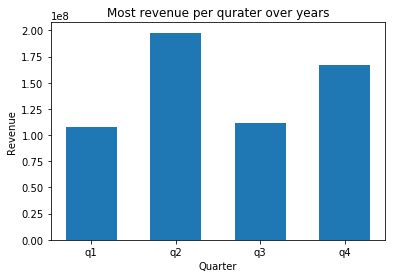

In [19]:
plt.bar(['q1','q2','q3','q4'],[q1,q2,q3,q4], width = 0.6);
plt.title('Most revenue per qurater over years');
plt.xlabel('Quarter');
plt.ylabel('Revenue');

> I used bar chart to make an easy visualisation to the relation between quarters and revenue

> The graph above shows that movies in quarter 2 then 4 make more revenue which may be related to the good weather in these two periods of the year or for any other reasons producers should figure out

## Research Question 2
### Does high budget movies affect on revenue ?

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['budget'].describe()


count    3.567000e+03
mean     4.697622e+07
std      4.411609e+07
min      1.000000e+06
25%      1.591257e+07
50%      3.272632e+07
75%      6.396512e+07
max      2.920507e+08
Name: budget, dtype: float64

In [21]:
first_quartile_budget = df['budget'].describe()['25%']
first_quartile = df.query('budget < 15912566.9966')
first_quartile_revenue = first_quartile['revenue'].sum()

In [22]:
third_quartile_budget = df['budget'].describe()['75%']
third_quartile = df.query('budget > 63965120.401604354')
third_quartile_revenue = third_quartile['revenue'].sum()

In [23]:
#getting the revenue between first and third quartile
df1 = df.query('budget < 63965120.401604354')        #df less than 75% of the budget
df2 = df.query('budget > 15912566.9966')             #df bigger than 25% of the budget
int_df = pd.merge(df1, df2, how ='inner')            # getting intersection between dataframes
int_revenue = int_df['revenue'].sum()

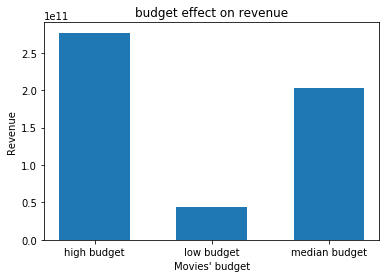

In [24]:
plt.bar(['low budget','median budget','high budget'], [first_quartile_revenue, int_revenue, third_quartile_revenue], width = 0.6);
plt.title('budget effect on revenue');
plt.xlabel('Movies\' budget');
plt.ylabel('Revenue');

> I used bar chart to make an easy visualisation to the relation between budget and revenue

> The graph above shows that revenue has a straight forward relation with budget

## Research Question 3
### Does high budget movies affect on high voting of viewers?

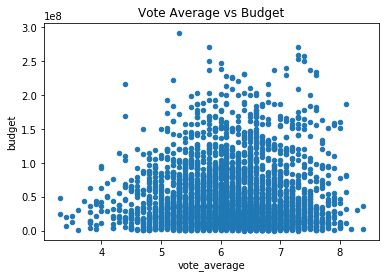

In [25]:
df.plot(x='vote_average',y='budget',kind='scatter')
plt.title('Vote Average vs Budget')
plt.show()

> I used scatter plot visualize the huge different data to show the relation between vote average and budget

> The plot above shows a very weak correlation between vote average and budget and also shows that low budget movies can get all kinds of votes (high and low), but high budget movies rarely gets low votes 

## Research Question 4
### in which peroid of time movies have the highest voting average? 

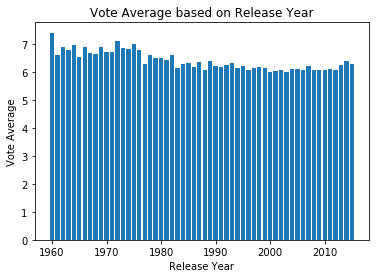

In [26]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'])
plt.title('Vote Average based on Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

> I used bar chart to visualise the vot avearge rates over years

> The graph above shows that old movies have slightly higher voting average than new movies

<a id='conclusions'></a>
## Conclusions

> There are many factors can affect on movies and makes everyone diffierent from others, in this project I have made analysis on movies according to the data in TMDB dataset and made those analysis to answer the questions that i saw they may be affecting on movies

> First question was to know which quarter of the year makes more revenue and study the reason behind the answer and then according to it that may help movies' producers to choose this part of the year to release their movies to make more revenue

> Second question was to know is the budget of the movie has an obvious relation to the revenue or not and according to the answer it seems that there is a relation

> Third and forth question were about high voting averages and trying to figure out a pattern for these high voting averages

## Limitations

> there were some columns having a lot of missing values, when i dropped rows that contains Nan values most of the data was deleted, so i had to figure out these columns and checked thier importance in the analysis and removing them before dropping rows containing Nan values to not lose most of the data like before

> there was data wasn't logical specially in the budget and revenue like some movies were making less than a 100 dollars revenue, so i cleaned these data and outliers to not affect badly on the analysis


In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0